In [1]:
from sklearn.linear_model import RidgeCV,LassoCV,Ridge,Lasso
from sklearn.svm import LinearSVR,SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import lightgbm as lgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
#没有用bagging和boosting
#stacking    先用几个不同的模型做预测  输出预测值  然后将这几个模型输出的预测值作为特征来训练一个新的模型

# 数据获取

In [3]:
# 获取数据

In [4]:
data=pd.read_excel("E://IT//毕设//result/data_twelve.xlsx")
data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12869 entries, 0 to 12868
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   租金            12869 non-null  int64  
 1   面积(平方米)       12869 non-null  float64
 2   服务费           12869 non-null  float64
 3   A地铁线          12869 non-null  int64  
 4   B地铁线          12869 non-null  int64  
 5   C地铁线          12869 non-null  int64  
 6   大区标签          12869 non-null  int64  
 7   品牌标签          12869 non-null  int64  
 8   租赁方式标签        12869 non-null  int64  
 9   装修标签          12869 non-null  int64  
 10  朝向标签          12869 non-null  int64  
 11  电梯_标签         12869 non-null  int64  
 12  车位_标签         12869 non-null  int64  
 13  用水_标签         12869 non-null  int64  
 14  用电_标签         12869 non-null  int64  
 15  燃气_标签         12869 non-null  int64  
 16  采暖_标签         12869 non-null  int64  
 17  A付款方式标签       12869 non-null  int64  
 18  B付款方式标签       12869 non-nu

In [5]:
df1=pd.DataFrame(data)

In [6]:
df1.head()

,租金,面积(平方米),服务费,A地铁线,B地铁线,C地铁线,大区标签,品牌标签,租赁方式标签,装修标签,...,平均值特征1,大区+街道平均值特征,朝向标签平均值特征,A地铁线平均值特征,大区英文平均值特征,房屋配置聚类平均值特征2,房屋装修聚类平均值特征3,房屋费用聚类平均值特征4,房屋便利聚类平均值特征5,小区_标签
0,6700,60.00,670.0,9,7,1,3,1,1,1,...,5712.720000,5225.413534,4163.071070,4992.092732,4882.436364,4414.579365,4351.671456,5000.154891,4586.337664,1
1,6400,80.48,640.0,11,1,-1,1,1,1,2,...,5998.750000,5229.564103,4524.850652,4779.522624,4494.741590,5145.811146,4513.637500,5000.154891,4586.337664,2
2,2580,36.00,258.0,16,-1,-1,5,1,1,2,...,2634.666667,3707.724551,4216.757028,3843.047228,4035.890179,4414.579365,4513.637500,5000.154891,4586.337664,3
3,5000,118.00,0.0,6,-1,-1,4,2,1,2,...,5048.131868,4953.176282,4525.573000,4597.347368,4466.491597,4699.096813,4260.068896,4703.166293,4586.337664,4
4,2300,34.00,0.0,20,20,-1,1,2,1,2,...,2735.000000,4020.554656,4216.757028,3262.638298,4494.741590,4414.579365,4513.637500,4703.166293,4586.337664,5


In [7]:
# 最大最小值缩放

In [8]:
def min_max_scaling(data, feature_range=(0, 1)):
    """
    对每列数据进行最大最小值缩放
    
    参数：
    - data：要进行缩放的数据，可以是 NumPy 数组、Pandas DataFrame 或其他类似数据结构
    - feature_range：缩放后的特征范围，默认为 (0, 1)
    
    返回值：
    - scaled_data：缩放后的数据
    """
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    range_min, range_max = feature_range
    
    scaled_data = (data - min_val) / (max_val - min_val) * (range_max - range_min) + range_min
    
    return scaled_data


In [9]:
df2=min_max_scaling(df1)

In [10]:
df2.head()

,租金,面积(平方米),服务费,A地铁线,B地铁线,C地铁线,大区标签,品牌标签,租赁方式标签,装修标签,...,平均值特征1,大区+街道平均值特征,朝向标签平均值特征,A地铁线平均值特征,大区英文平均值特征,房屋配置聚类平均值特征2,房屋装修聚类平均值特征3,房屋费用聚类平均值特征4,房屋便利聚类平均值特征5,小区_标签
0,0.676768,0.017424,0.011168,0.476190,0.380952,0.2,0.222222,0.000000,0.0,0.0,...,0.579035,0.710206,0.878064,0.880589,0.958764,0.676576,0.330918,1.000000,1.0,0.000000
1,0.646465,0.023273,0.010668,0.571429,0.095238,0.0,0.000000,0.000000,0.0,1.0,...,0.608021,0.711188,0.992999,0.772354,0.681667,1.000000,0.916027,1.000000,1.0,0.000368
2,0.260606,0.010568,0.004302,0.809524,0.000000,0.0,0.444444,0.000000,0.0,1.0,...,0.267101,0.351050,0.895120,0.295528,0.353712,0.676576,0.916027,1.000000,1.0,0.000737
3,0.505051,0.033990,0.000002,0.333333,0.000000,0.0,0.333333,0.066667,0.0,1.0,...,0.511684,0.645782,0.993229,0.679596,0.661476,0.802418,0.000000,0.897086,1.0,0.001105
4,0.232323,0.009997,0.000002,1.000000,1.000000,0.0,0.000000,0.066667,0.0,1.0,...,0.277269,0.425081,0.895120,0.000000,0.681667,0.676576,0.916027,0.897086,1.0,0.001474


In [11]:
# x_columns=[ '面积(平方米)', '服务费', 'A地铁线', 'B地铁线', 'C地铁线', '大区标签', '品牌标签',
#        '租赁方式标签', '装修标签', '朝向标签', '电梯_标签', '车位_标签', '用水_标签', '用电_标签', '燃气_标签',
#        '采暖_标签', 'A付款方式标签', 'B付款方式标签', 'C付款方式标签', '楼层标签', '卧室', '客厅', '卫生间',
#        '房+卫+厅', '房/总', '卫/总', '厅/总', '卧室面积', '户型', '是否地铁', '平均值特征1',
#        '大区+街道平均值特征', '朝向标签平均值特征', 'A地铁线平均值特征', '大区英文平均值特征', '房屋配置聚类平均值特征2',
#        '房屋装修聚类平均值特征3', '房屋费用聚类平均值特征4', '房屋便利聚类平均值特征5', '小区_标签']
x_columns=['A付款方式标签', '大区+街道平均值特征', '装修标签',  '客厅', '房+卫+厅', '卫/总', '大区英文平均值特征', 
           '房屋配置聚类平均值特征2', 'B付款方式标签', 'A地铁线', '朝向标签平均值特征', 'C付款方式标签', '小区_标签',
           'A地铁线平均值特征', 'B地铁线', '大区标签', 'C地铁线', '卫生间', '燃气_标签', '面积(平方米)', '房屋便利聚类平均值特征5',
           '平均值特征1', '电梯_标签', '卧室面积', '用水_标签', '房/总', '户型', '用电_标签']
y_label='租金'
x=df2[x_columns]
y=df2[y_label]
y.isnull().sum()

0

In [12]:
# cols=['A付款方式标签', '大区+街道平均值特征', '装修标签',  '客厅', '房+卫+厅', '卫/总', '大区英文平均值特征', '房屋配置聚类平均值特征2', 'B付款方式标签', 'A地铁线', '朝向标签平均值特征', 'C付款方式标签', '小区_标签', 'A地铁线平均值特征', 'B地铁线', '大区标签', 'C地铁线', '卫生间', '燃气_标签', '面积(平方米)', '房屋便利聚类平均值特征5', '平均值特征1', '电梯_标签', '卧室面积', '用水_标签', '房/总', '户型', '用电_标签']

In [13]:
#2.分割数据集
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=12)

In [14]:
# #3.特征转换
# vector=DictVectorizer(sparse=True)
# x_train=vector.fit_transform(train_x.to_dict(orient='records'))
# x_test=vector.transform(test_x.to_dict(orient='records'))

In [15]:
x_train=train_x
x_test=test_x

In [16]:
x_train

,A付款方式标签,大区+街道平均值特征,装修标签,客厅,房+卫+厅,卫/总,大区英文平均值特征,房屋配置聚类平均值特征2,B付款方式标签,A地铁线,...,燃气_标签,面积(平方米),房屋便利聚类平均值特征5,平均值特征1,电梯_标签,卧室面积,用水_标签,房/总,户型,用电_标签
5936,0.333333,0.384665,1.0,0.285714,0.181818,0.003322,0.958764,0.676576,0.0,0.095238,...,0.000000,0.013710,1.000000,0.281238,0.0,0.128896,0.000000,0.993401,0.071338,0.000000
7821,0.333333,0.266218,1.0,0.285714,0.212121,0.002494,0.353712,0.676576,0.0,0.190476,...,0.000000,0.021422,1.000000,0.338327,0.0,0.121312,0.000000,0.995049,0.135032,0.000000
855,0.333333,0.480808,1.0,0.142857,0.151515,0.004975,0.577698,0.676576,0.0,0.476190,...,0.000000,0.008855,1.000000,0.453096,0.0,0.115761,0.000000,0.995037,0.064968,0.000000
5731,0.333333,0.329323,1.0,0.428571,0.333333,0.002497,0.577698,0.802418,0.0,0.095238,...,0.000000,0.053128,1.000000,0.363760,0.0,0.128584,0.333333,0.995056,0.269427,0.333333
6154,0.333333,0.562284,1.0,0.428571,0.272727,0.001664,0.681667,0.705224,0.0,0.000000,...,0.000000,0.014567,0.897622,0.423200,0.0,0.105545,0.666667,0.995054,0.205096,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3714,0.333333,0.779139,0.0,0.428571,0.272727,0.001664,0.958764,1.000000,0.0,0.190476,...,0.000000,0.025421,1.000000,0.573669,0.0,0.115397,0.333333,0.995054,0.205096,0.333333
7409,0.333333,0.645782,1.0,0.428571,0.303030,0.002853,0.661476,0.802418,0.0,0.333333,...,0.666667,0.028278,0.897622,0.533974,0.5,0.117989,0.333333,0.994349,0.205732,0.333333
3325,0.333333,0.329323,1.0,0.428571,0.242424,0.001996,0.577698,1.000000,0.0,0.095238,...,0.000000,0.023136,1.000000,0.420053,0.0,0.123641,0.000000,0.994064,0.141401,0.000000
9606,0.333333,0.480808,0.0,0.428571,0.303030,0.001427,0.577698,0.705224,0.0,0.000000,...,0.000000,0.007426,0.928363,0.372361,0.0,0.097447,0.000000,0.995761,0.268790,0.000000


In [17]:
x_train.shape

(9008, 28)

In [18]:
# #4.降维----线性回归和svm可以采用降维后的特征
# pca=PCA(0.98)
# pca_x_train=pca.fit_transform(x_train.toarray())
# pca_x_test=pca.transform(x_test.toarray())

In [19]:
pca_x_train=x_train
pca_x_test=x_test

In [20]:
pca_x_train.shape

(9008, 28)

In [21]:
# #5.特征标准化
# trans=StandardScaler()
# new_x_train=trans.fit_transform(pca_x_train)
# new_x_test=trans.transform(pca_x_test)

In [22]:
new_x_train=pca_x_train

In [23]:
new_x_test=pca_x_test

In [24]:
new_x_train

,A付款方式标签,大区+街道平均值特征,装修标签,客厅,房+卫+厅,卫/总,大区英文平均值特征,房屋配置聚类平均值特征2,B付款方式标签,A地铁线,...,燃气_标签,面积(平方米),房屋便利聚类平均值特征5,平均值特征1,电梯_标签,卧室面积,用水_标签,房/总,户型,用电_标签
5936,0.333333,0.384665,1.0,0.285714,0.181818,0.003322,0.958764,0.676576,0.0,0.095238,...,0.000000,0.013710,1.000000,0.281238,0.0,0.128896,0.000000,0.993401,0.071338,0.000000
7821,0.333333,0.266218,1.0,0.285714,0.212121,0.002494,0.353712,0.676576,0.0,0.190476,...,0.000000,0.021422,1.000000,0.338327,0.0,0.121312,0.000000,0.995049,0.135032,0.000000
855,0.333333,0.480808,1.0,0.142857,0.151515,0.004975,0.577698,0.676576,0.0,0.476190,...,0.000000,0.008855,1.000000,0.453096,0.0,0.115761,0.000000,0.995037,0.064968,0.000000
5731,0.333333,0.329323,1.0,0.428571,0.333333,0.002497,0.577698,0.802418,0.0,0.095238,...,0.000000,0.053128,1.000000,0.363760,0.0,0.128584,0.333333,0.995056,0.269427,0.333333
6154,0.333333,0.562284,1.0,0.428571,0.272727,0.001664,0.681667,0.705224,0.0,0.000000,...,0.000000,0.014567,0.897622,0.423200,0.0,0.105545,0.666667,0.995054,0.205096,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3714,0.333333,0.779139,0.0,0.428571,0.272727,0.001664,0.958764,1.000000,0.0,0.190476,...,0.000000,0.025421,1.000000,0.573669,0.0,0.115397,0.333333,0.995054,0.205096,0.333333
7409,0.333333,0.645782,1.0,0.428571,0.303030,0.002853,0.661476,0.802418,0.0,0.333333,...,0.666667,0.028278,0.897622,0.533974,0.5,0.117989,0.333333,0.994349,0.205732,0.333333
3325,0.333333,0.329323,1.0,0.428571,0.242424,0.001996,0.577698,1.000000,0.0,0.095238,...,0.000000,0.023136,1.000000,0.420053,0.0,0.123641,0.000000,0.994064,0.141401,0.000000
9606,0.333333,0.480808,0.0,0.428571,0.303030,0.001427,0.577698,0.705224,0.0,0.000000,...,0.000000,0.007426,0.928363,0.372361,0.0,0.097447,0.000000,0.995761,0.268790,0.000000


In [25]:
new_x_train.shape

(9008, 28)

In [26]:
# def rmse(y_true,y_pred):
#     y_pred=np.exp(y_pred)-1#转换成真实的租金
#     y_true=np.exp(y_true)-1
#     return np.sqrt(mean_squared_error(y_true,y_pred))

# MODEL

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# 构建子模型

## 构建岭回归模型

In [29]:
#1.参数搜索
ridge=Ridge(solver='svd')
params={
    "alpha":[0.005,0.01,1,5,10,20,50,80,100,150,200,300,500,800,900,1000]

}
model1=GridSearchCV(ridge,param_grid=params,cv=5,n_jobs=-1)
model1.fit(new_x_train,train_y)
model1.best_params_   
#{'alpha': 500, 'fit_intercept': True}

{'alpha': 1}

In [30]:
#利用搜索出的最优参数构建模型
ridge=Ridge(solver='svd',alpha=500)
ridge.fit(new_x_train,train_y)

Ridge(alpha=500, solver='svd')

In [31]:
y_pred_test=ridge.predict(new_x_test)
y_pred_train=ridge.predict(new_x_train)
print("训练集RMSE:", mean_squared_error(train_y, y_pred_train, squared=False))
print("测试集RMSE:", mean_squared_error(test_y, y_pred_test, squared=False))
print("训练集R2:", r2_score(train_y, y_pred_train))
print("测试集R2:", r2_score(test_y, y_pred_test))

训练集RMSE: 0.2050646586594792
测试集RMSE: 0.20384141275188578
训练集R2: 0.21940781374130325
测试集R2: 0.21644601214905435


In [32]:
#信500
y_pred_test=ridge.predict(new_x_test)
y_pred_train=ridge.predict(new_x_train)
print("训练集rmse：",mean_squared_error(train_y,y_pred_train))
print("测试集rmse：",mean_squared_error(test_y,y_pred_test))

训练集rmse： 0.04205151423112872
测试集rmse： 0.04155132155268466


## 构建lasso回归

In [33]:
#1.参数搜索
lasso=Lasso()
params={
    "alpha":[0.001,0.01,0.05,0.1,0.5,1,5,10],
    "fit_intercept":[True,False] 
}
model2=GridSearchCV(lasso,param_grid=params,cv=5,n_jobs=-1)
model2.fit(new_x_train,train_y)
model2.best_params_
#{'alpha': 0.001, 'fit_intercept': True}

{'alpha': 0.001, 'fit_intercept': True}

In [34]:
#利用搜索出的最优参数构建模型
lasso=Lasso()
lasso.fit(new_x_train,train_y)

Lasso()

In [35]:
y_pred_test=lasso.predict(new_x_test)
y_pred_train=lasso.predict(new_x_train)
print("训练集rmse：",mean_squared_error(train_y,y_pred_train))
print("测试集rmse：",mean_squared_error(test_y,y_pred_test))

训练集rmse： 0.05387129793429983
测试集rmse： 0.05304391771139186


In [36]:
y_pred_test=lasso.predict(new_x_test)
y_pred_train=lasso.predict(new_x_train)
print("训练集rmse：",mean_squared_error(train_y,y_pred_train))
print("测试集rmse：",mean_squared_error(test_y,y_pred_test))
print("训练集R2:", r2_score(train_y, y_pred_train))
print("测试集R2:", r2_score(test_y, y_pred_test))

训练集rmse： 0.05387129793429983
测试集rmse： 0.05304391771139186
训练集R2: 0.0
测试集R2: -0.0002756037807201128


## 构建随机森林

In [37]:
# #1.参数搜索 
# rf=RandomForestRegressor(max_features='sqrt')#设置max_features='sqrt'，不然太耗时间
# params = {
#     "n_estimators": [100, 200, 300],  # 决策树数量
#     "max_depth": [10, 20, 30, 50],  # 决策树最大深度
#     "min_samples_split": [20, 30, 50],  # 内部节点再划分所需的最小样本数
#     "min_samples_leaf": [10, 20, 30],  # 叶节点上的最小样本数
# #     "max_features": ["auto", "sqrt", "log2"],  # 划分时考虑的最大特征数
    
#     "random_state": [42]  # 随机种子
# }
# model3=GridSearchCV(rf,param_grid=params,cv=5,n_jobs=-1,verbose=2)
# model3.fit(x_train,train_y)
# model3.best_params_
# # {'max_depth': 30,
# #  'min_samples_leaf': 10,
# #  'min_samples_split': 20,
# #  'n_estimators': 300,
# #  'random_state': 42}

In [38]:
#利用搜索出的最优参数构建模型
rf=RandomForestRegressor(random_state=42,n_estimators=150,max_depth=10,min_samples_leaf=10,min_samples_split=20,max_features='sqrt')
rf.fit(x_train,train_y)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                      min_samples_split=20, n_estimators=150, random_state=42)

In [39]:
y_pred_test=rf.predict(x_test)
y_pred_train=rf.predict(x_train)
print("训练集rmse：",mean_squared_error(train_y,y_pred_train))
print("测试集rmse：",mean_squared_error(test_y,y_pred_test))
print("训练集R2:", r2_score(train_y, y_pred_train))
print("测试集R2:", r2_score(test_y, y_pred_test))

训练集rmse： 0.021060602318384213
测试集rmse： 0.023940142733258563
训练集R2: 0.6090570837170244
测试集R2: 0.5485487920142075


In [40]:
y_pred_train

array([0.44691629, 0.37388364, 0.38257955, ..., 0.56965352, 0.29980802,
       0.52978533])

In [41]:
y_pred_test

array([0.46869762, 0.42546432, 0.29704477, ..., 0.55020719, 0.39086299,
       0.4074952 ])

In [42]:
#新数据
y_pred_test=rf.predict(x_test)
y_pred_train=rf.predict(x_train)
print("训练集rmse：",mean_squared_error(train_y,y_pred_train))
print("测试集rmse：",mean_squared_error(test_y,y_pred_test))

训练集rmse： 0.021060602318384213
测试集rmse： 0.023940142733258563


## 构建决策树

In [43]:
# from sklearn.tree import DecisionTreeRegressor
# tree=DecisionTreeRegressor()
# params = {
#     "max_depth": [40, 50, 60, 70],
#     "min_samples_split": [5, 10, 20, 30, 40, 50],
#     "min_samples_leaf": [2, 3, 5, 7, 9, 11, 13, 15, 18, 20, 22, 24, 26, 28],
# }

# model4=GridSearchCV(tree,param_grid=params,cv=5,n_jobs=-1)
# model4.fit(x_train,train_y)
# model4.best_params_
# # {'max_depth': 70, 'min_samples_leaf': 20, 'min_samples_split': 30}

In [44]:
from sklearn.tree import DecisionTreeRegressor
#利用搜索出的最优参数构建模型
tree=DecisionTreeRegressor(random_state=42,max_depth=10,min_samples_leaf=20,min_samples_split=30)
tree.fit(x_train,train_y)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=30,
                      random_state=42)

In [45]:
# y_pred_test=tree.predict(x_test)
# y_pred_train=tree.predict(x_train)
# print("训练集rmse：",mean_squared_error(train_y,y_pred_train))
# print("测试集rmse：",mean_squared_error(test_y,y_pred_test))

In [46]:
#新
y_pred_test=tree.predict(x_test)
y_pred_train=tree.predict(x_train)
print("训练集rmse：",mean_squared_error(train_y,y_pred_train))
print("测试集rmse：",mean_squared_error(test_y,y_pred_test))
print("训练集R2:", r2_score(train_y, y_pred_train))
print("测试集R2:", r2_score(test_y, y_pred_test))

训练集rmse： 0.02054405839922896
测试集rmse： 0.02608069776178817
训练集R2: 0.6186455647628165
测试集R2: 0.5081832785685731


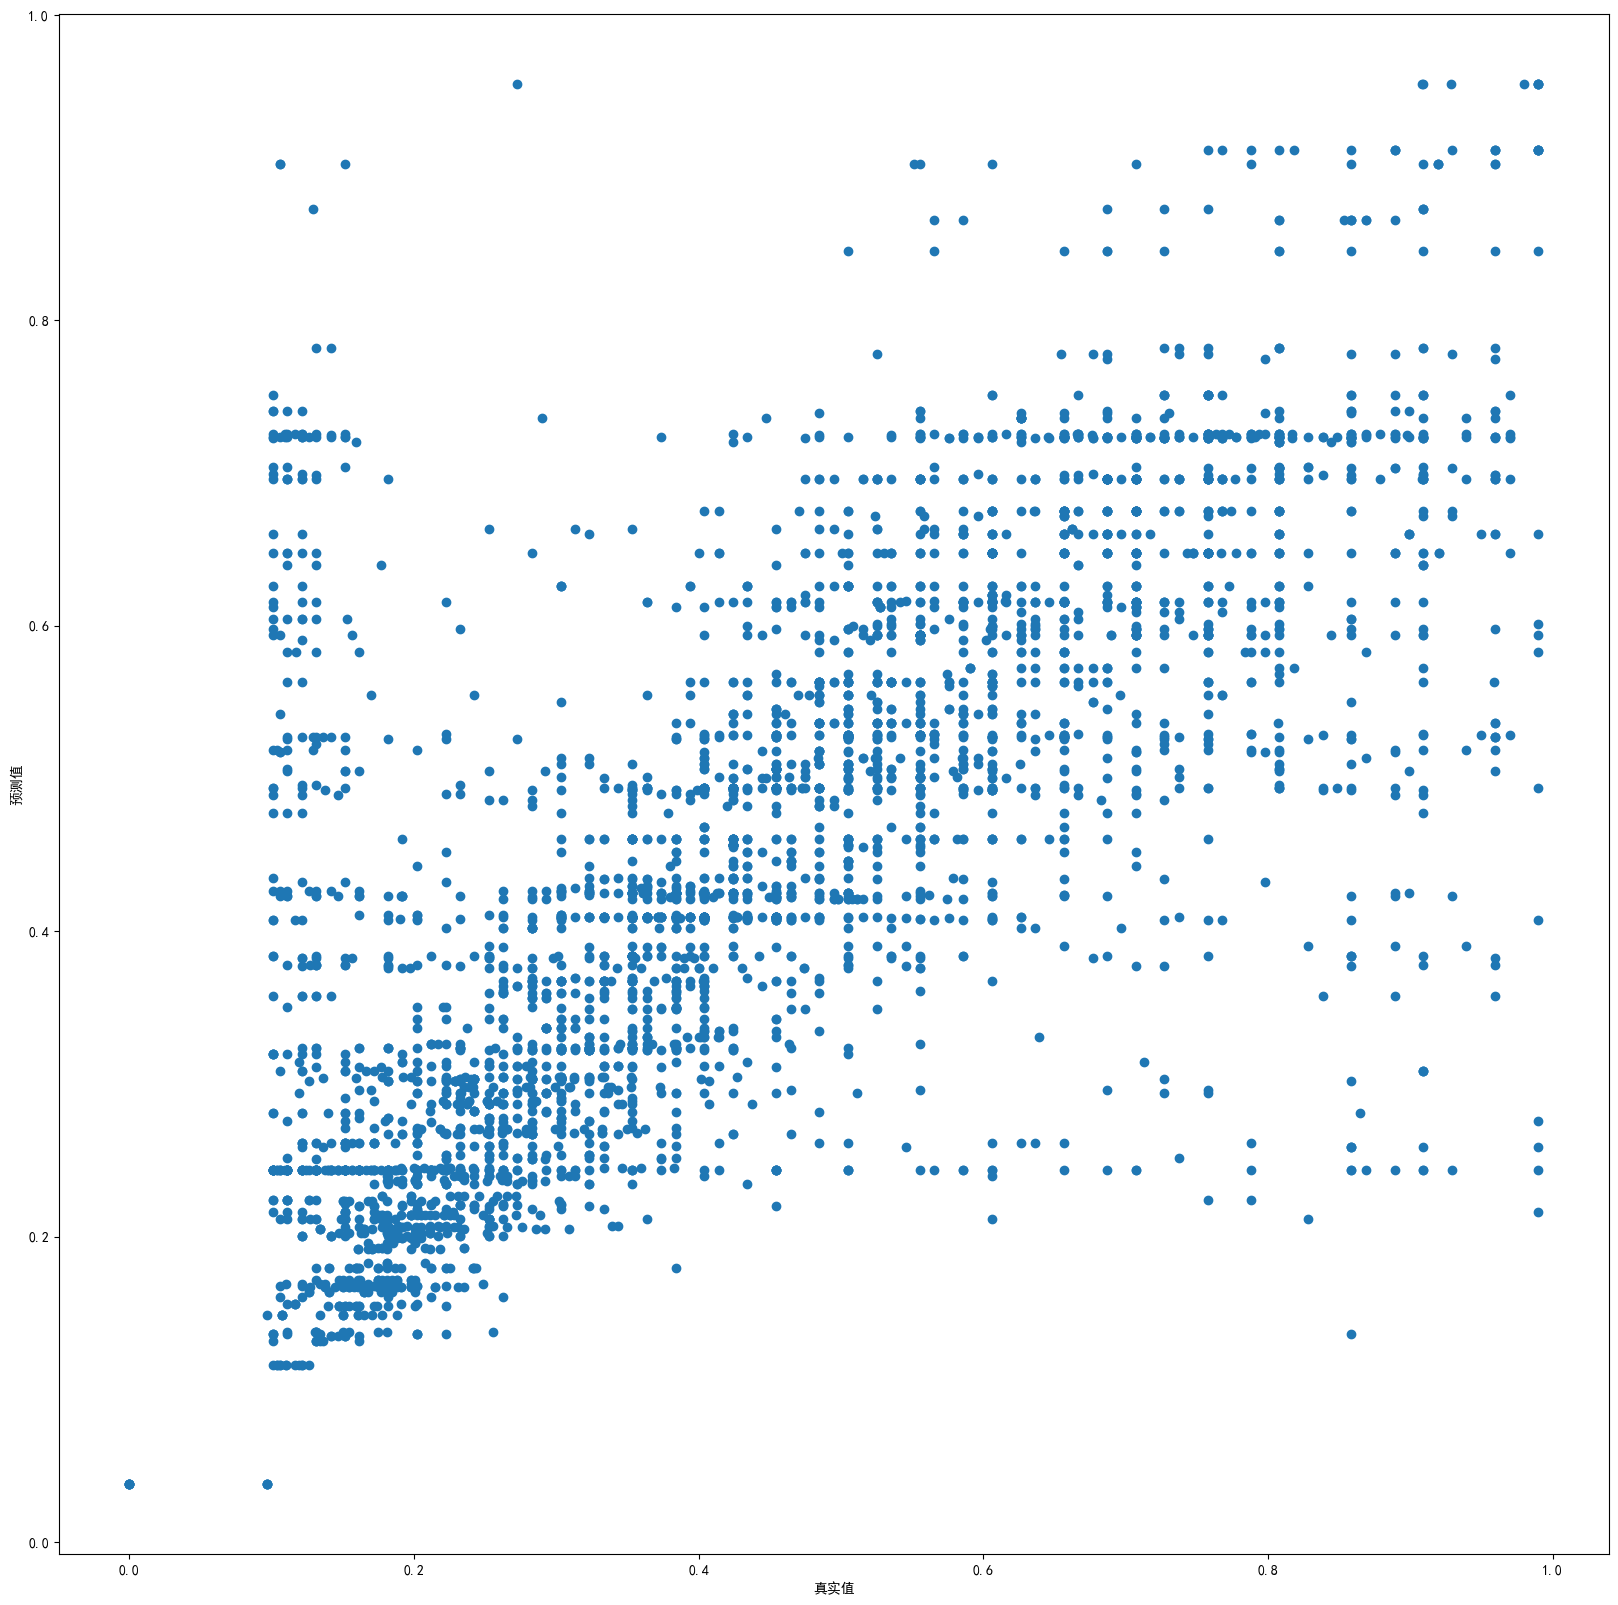

In [47]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(20,20),dpi=100)
plt.scatter(test_y,y_pred_test)
plt.xlabel("真实值")
plt.ylabel("预测值")
plt.show()

## 构建支持向量机

In [48]:
# #1.参数搜索----数据量大 svm太耗时，调参几乎不可能
# svr=SVR()
# params={
#     "gamma":[0.001,0.01,0.1,0.5,1,5],
#     "C":[0.001,0.1,0.5,1,5] 
# }
# model5=GridSearchCV(svr,param_grid=params,cv=5,n_jobs=-1,verbose=10)
# model5.fit(new_x_train,train_y)
# model5.best_params_

In [51]:
#随意选一组参数   --- 耗时太长 放弃该模型
svr=SVR(gamma=0.1,C=0.5)
svr.fit(new_x_train,train_y)
y_pred=svr.predict(new_x_test)
mean_squared_error(test_y,y_pred)

0.032865052799219564

## 构建xgboost模型

In [52]:
from xgboost import XGBRegressor

In [54]:
import xgboost as xgb
params={
    "objective":'reg:linear',
    'eta':0.1,
    'gamma': 0.05,
    'silent': 1,
    'max_depth':45, 
    'min_child_weight':0.5,
    'sub_sample':0.6,
    'reg_alpha':0.5,
    'reg_lambda':0.8,
    'colsample_bytree':0.5
}
dtrain = xgb.DMatrix(x_train,train_y)
dtest = xgb.DMatrix(x_test,test_y)
bst = xgb.train(params, dtrain, num_boost_round=2000)

C:\Users\Chc\.conda\envs\tipdm\lib\site-packages\xgboost\core.py:160: UserWarning: [17:28:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\Chc\.conda\envs\tipdm\lib\site-packages\xgboost\core.py:160: UserWarning: [17:28:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent", "sub_sample" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# 定义参数列表
params_grid = {
    'objective': ['reg:linear'],  # 损失函数
    'eta': [0.05, 0.1, 0.2],  # 学习率
    'gamma': [0.05],
    'max_depth': [45], 
    'min_child_weight': [0.5],
    'sub_sample': [0.6],
    'reg_alpha': [0.5],
    'reg_lambda': [0.8],
    'colsample_bytree': [0.5]
}

# 创建 XGBoost 回归模型
xgb_model = XGBRegressor()

# 使用 GridSearchCV 进行参数搜索
xgb_grid_model = GridSearchCV(estimator=xgb_model, param_grid=params_grid, cv=5, n_jobs=-1)

# 拟合模型
xgb_grid_model.fit(x_train, train_y)

# 输出最佳参数
print("Best Parameters:", xgb_grid_model.best_params_)


In [ ]:
# Best Parameters: {'colsample_bytree': 0.5, 'eta': 0.05, 'gamma': 0.05, 'max_depth': 45, 'min_child_weight': 0.5, 'objective': 'reg:linear', 'reg_alpha': 0.5, 'reg_lambda': 0.8, 'sub_sample': 0.6}

In [55]:
# 使用最佳参数初始化 XGBoost 模型
best_params ={
        'max_depth': 5, 
        'eta': 0.01, 
        'verbosity': 1, 
        'objective': 'reg:linear',
        'silent': 1,
        'gamma': 0.01,
        'min_child_weight': 1
    }
bst_model = xgb.train(params=best_params, dtrain=dtrain, num_boost_round=2000)



C:\Users\Chc\.conda\envs\tipdm\lib\site-packages\xgboost\core.py:160: UserWarning: [17:28:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\Chc\.conda\envs\tipdm\lib\site-packages\xgboost\core.py:160: UserWarning: [17:28:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [56]:
# 使用训练好的模型进行预测
y_pred_train = bst_model.predict(dtrain)
y_pred_test = bst_model.predict(dtest)
print("训练集rmse：",mean_squared_error(train_y,y_pred_train))
print("测试集rmse：",mean_squared_error(test_y,y_pred_test))
print("训练集R2:", r2_score(train_y, y_pred_train))
print("测试集R2:", r2_score(test_y, y_pred_test))

训练集rmse： 0.015618196518583205
测试集rmse： 0.02120948789722768
训练集R2: 0.7100831589832717
测试集R2: 0.6000421117514284


In [ ]:
# y_pred_test=bst.predict(dtest)
# y_pred_train=bst.predict(dtrain)
# print("训练集rmse：",rmse(train_y,y_pred_train))
# print("测试集rmse：",rmse(test_y,y_pred_test))

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20),dpi=100)
plt.scatter(test_y,y_pred_test)
plt.xlabel("真实值")
plt.ylabel("预测值")
plt.show()

## 构建Gd梯度回归


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# # 定义参数
# params = {
#     'learning_rate': [0.05, 0.1, 0.2],  # 学习率
#     'n_estimators': [100, 200, 300],  # 决策树数量
#     'max_depth': [3, 4, 5],  # 决策树最大深度
#     'min_samples_split': [2, 5, 10],  # 内部节点再划分所需的最小样本数
#     'min_samples_leaf': [1, 2, 4]  # 叶节点上的最小样本数
# #     'subsample': [0.6, 0.7, 0.8],  # 子样本采样率
# #     'alpha': [0.1, 0.5, 1.0],  # 正则化参数
# #     'loss': ['ls'],  # 损失函数: least squares regression
# #     'random_state': [42]  # 随机种子
# }

# # 创建梯度提升回归模型
# gbr = GradientBoostingRegressor()
# gb_model=GridSearchCV(gbr,param_grid=params,cv=5,n_jobs=-1)
# # 拟合模型
# gb_model.fit(x_train, train_y)
# gb_model.best_params_


In [ ]:
# 'random_state': 42,
#   'min_samples_split': 2,
#   'min_samples_leaf': 2,
#   'max_features': 'log2',
#   'max_depth': 100},

In [57]:
#利用搜索出的最优参数构建模型
gb=GradientBoostingRegressor(random_state=42,learning_rate=0.2,
                         n_estimators=300,min_samples_split=2,min_samples_leaf=2,max_depth=100)
gb.fit(x_train,train_y)

GradientBoostingRegressor(learning_rate=0.2, max_depth=100, min_samples_leaf=2,
                          n_estimators=300, random_state=42)

In [58]:
## 模型预测
y_pred_train = gb.predict(x_train)
y_pred_test = gb.predict(x_test)
print("训练集rmse：",mean_squared_error(train_y,y_pred_train))
print("测试集rmse：",mean_squared_error(test_y,y_pred_test))
print("训练集R2:", r2_score(train_y, y_pred_train))
print("测试集R2:", r2_score(test_y, y_pred_test))

训练集rmse： 6.417683846518035e-05
测试集rmse： 0.021924851975737663
训练集R2: 0.998808700719566
测试集R2: 0.5865521346451383


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20),dpi=100)
plt.scatter(test_y,y_pred_test)
plt.xlabel("真实值")
plt.ylabel("预测值")
plt.show()

## 构建LIGHTGBM

In [ ]:
import lightgbm as lgb

In [ ]:
# # 定义参数
# params = {
#     'learning_rate': [0.05, 0.1, 0.2],  # 学习率
#     'n_estimators': [100, 300,500],  # 决策树数量
#     'max_depth': [3, 4, 5],  # 决策树最大深度
# #     'min_child_samples': [2, 5, 10],  # 叶节点中最小样本数
# #     'subsample': [0.6, 0.7, 0.8]  # 子样本采样率
# #     'colsample_bytree': [0.6, 0.7, 0.8],  # 列采样率
# #     'reg_alpha': [0.1, 0.5, 1.0],  # L1 正则化参数
# #     'reg_lambda': [0.1, 0.5, 1.0],  # L2 正则化参数
# #     'random_state': [42]  # 随机种子
# }
# # 创建 LightGBM 回归模型
# lgb_model = lgb.LGBMRegressor()

# # 使用 GridSearchCV 进行参数搜索
# lgb_grid_model = GridSearchCV(estimator=lgb_model, param_grid=params, cv=5, n_jobs=-1)

# # 拟合模型
# lgb_grid_model.fit(x_train, train_y)

# # 输出最佳参数
# print("Best Parameters:", lgb_grid_model.best_params_)

In [ ]:
# {'subsample': 1.0, 'random_state': 42, 'min_child_weight': 1, 'min_child_samples': 2, 'max_depth': -1, 'colsample_bytree': 1.0}

In [59]:
#利用搜索出的最优参数构建模型
lgb1=lgb.LGBMRegressor(random_state=42)
lgb1.fit(x_train,train_y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1445
[LightGBM] [Info] Number of data points in the train set: 9008, number of used features: 28
[LightGBM] [Info] Start training from score 0.449156


LGBMRegressor(random_state=42)

In [60]:
## 模型预测
y_pred_train = lgb1.predict(x_train)
y_pred_test = lgb1.predict(x_test)
print("训练集rmse：",mean_squared_error(train_y,y_pred_train))
print("测试集rmse：",mean_squared_error(test_y,y_pred_test))
print("训练集R2:", r2_score(train_y, y_pred_train))
print("测试集R2:", r2_score(test_y, y_pred_test))

训练集rmse： 0.013018823191203668
测试集rmse： 0.0194747263776961
训练集R2: 0.7583347034429889
测试集R2: 0.6327553746707761


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20),dpi=100)
plt.scatter(test_y,y_pred_test)
plt.xlabel("真实值")
plt.ylabel("预测值")
plt.show()

## 构建神经网络MLP

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
# # 定义参数列表
# params = {
#     'hidden_layer_sizes': [(100,), (200,), (300,)],  # 隐藏层神经元数量
#     'activation': ['identity', 'logistic', 'tanh', 'relu'],  # 激活函数
#     'solver': ['lbfgs', 'sgd', 'adam'],  # 优化器
#     'alpha': [0.0001, 0.001, 0.01],  # 正则化参数
#     'learning_rate': ['constant', 'invscaling', 'adaptive'],  # 学习率策略
#     'learning_rate_init': [0.001, 0.01, 0.1],  # 初始学习率
#     'max_iter': [100, 200, 300],  # 最大迭代次数
#     'random_state': [42]  # 随机种子
# }

# # 创建 MLP 回归模型
# mlp_model = MLPRegressor()

# # 使用 GridSearchCV 进行参数搜索
# mlp_grid_model = GridSearchCV(estimator=mlp_model, param_grid=params, cv=5, n_jobs=-1)

# # 拟合模型
# mlp_grid_model.fit(x_train, train_y)

# # 输出最佳参数
# print("Best Parameters:", mlp_grid_model.best_params_)

In [61]:
#利用搜索出的最优参数构建模型
mlp=MLPRegressor(hidden_layer_sizes=100)
mlp.fit(x_train,train_y)

MLPRegressor(hidden_layer_sizes=100)

In [62]:
## 模型预测
y_pred_train = mlp.predict(x_train)
y_pred_test = mlp.predict(x_test)
print("训练集rmse：",mean_squared_error(train_y,y_pred_train))
print("测试集rmse：",mean_squared_error(test_y,y_pred_test))
print("训练集R2:", r2_score(train_y, y_pred_train))
print("测试集R2:", r2_score(test_y, y_pred_test))

训练集rmse： 0.028956406128853165
测试集rmse： 0.030663430688004065
训练集R2: 0.4624891688303534
测试集R2: 0.4217643988455937


## Stacking融合

In [175]:
#获取每个子模型的预测结果作为特征
train_features=[]
train_features.append(ridge.predict(new_x_train))#将每个模型预测值保存起来
# train_features.append(lasso.predict(new_x_train))
train_features.append(svr.predict(new_x_train))#这个太慢了  不要了
train_features.append(rf.predict(x_train))
train_features.append(tree.predict(x_train))
# train_features.append(bst.predict(dtrain))
train_features.append(gb.predict(x_train))
train_features.append(lgb1.predict(x_train))
# train_features.append(mlp.predict(x_train))

test_features=[]
test_features.append(ridge.predict(new_x_test))
# test_features.append(lasso.predict(new_x_test))
test_features.append(svr.predict(new_x_test))
test_features.append(rf.predict(x_test))
test_features.append(tree.predict(x_test))
# test_features.append(bst.predict(dtest))
test_features.append(gb.predict(x_test))
test_features.append(lgb1.predict(x_test))
# test_features.append(mlp.predict(x_test))

In [188]:
x_test.shape

(3861, 28)

In [ ]:
#加权平均法

In [189]:
    import numpy as np
    from sklearn.metrics import mean_squared_error, r2_score

    # 定义每个子模型的权重
    weights = [0.1, 0.1, 0.25, 0.25, 0.2,0.1]  # 假设每个子模型权重相同

    # 定义每个子模型
    models = [ridge, svr, rf, tree,gb, lgb1]  # 假设这些是已经定义好的模型

    # 获取每个子模型的预测结果作为特征
    train_features = []
    test_features = []
    for model in models:
        train_features.append(model.predict(new_x_train))
        test_features.append(model.predict(new_x_test))

    # 对每个样本进行加权平均
    train_predictions = np.average(train_features, axis=0, weights=weights)
    test_predictions = np.average(test_features, axis=0, weights=weights)

    # 计算加权平均后的RMSE和R2
    train_rmse = mean_squared_error(train_y, train_predictions, squared=False)
    test_rmse = mean_squared_error(test_y, test_predictions, squared=False)
    train_r2 = r2_score(train_y, train_predictions)
    test_r2 = r2_score(test_y, test_predictions)

    print("训练集RMSE：", train_rmse)
    print("测试集RMSE：", test_rmse)
    print("训练集R2:", train_r2)
    print("测试集R2:", test_r2)


训练集RMSE： 0.11396452186680335
测试集RMSE： 0.1463805308330294
训练集R2: 0.7589084959458587
测试集R2: 0.5959354782693644


In [ ]:
#voting法

In [190]:
from sklearn.ensemble import VotingRegressor

# 定义每个子模型
models = [('ridge', ridge), ('svr', svr), ('rf', rf), ('tree', tree), ('gb', gb), ('lgb1', lgb1)]

# 定义投票法模型
voting_model = VotingRegressor(estimators=models, weights=weights)

# 使用训练数据进行拟合
voting_model.fit(new_x_train, train_y)

# 在训练集和测试集上进行预测
train_predictions = voting_model.predict(new_x_train)
test_predictions = voting_model.predict(new_x_test)

# 计算加权平均后的RMSE和R2
train_rmse = mean_squared_error(train_y, train_predictions, squared=False)
test_rmse = mean_squared_error(test_y, test_predictions, squared=False)
train_r2 = r2_score(train_y, train_predictions)
test_r2 = r2_score(test_y, test_predictions)

print("训练集RMSE：", train_rmse)
print("测试集RMSE：", test_rmse)
print("训练集R2:", train_r2)
print("测试集R2:", test_r2)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1445
[LightGBM] [Info] Number of data points in the train set: 9008, number of used features: 28
[LightGBM] [Info] Start training from score 0.449156
训练集RMSE： 0.11396452186680335
测试集RMSE： 0.1463805308330294
训练集R2: 0.7589084959458587
测试集R2: 0.5959354782693644


In [176]:
mx_train=np.vstack(train_features).T
mx_test=np.vstack(test_features).T
mx_train.shape

(9008, 5)

In [177]:
mx_train

array([[0.42743072, 0.28113701, 0.44691629, 0.6047397 , 0.47807868],
       [0.40473946, 0.31974949, 0.37388364, 0.40920928, 0.33662017],
       [0.46524285, 0.44155318, 0.38257955, 0.40882521, 0.4113655 ],
       ...,
       [0.47179028, 0.45491922, 0.56965352, 0.72549176, 0.73672391],
       [0.42487645, 0.40479269, 0.29980802, 0.26703143, 0.29324586],
       [0.51356002, 0.53318588, 0.52978533, 0.60894661, 0.55742543]])

In [178]:
#线性回归

In [179]:
stack_model=Ridge(fit_intercept=False ,solver='svd')
params={
    "alpha":np.logspace(-2,3,20)
}
model=GridSearchCV(stack_model,param_grid=params,cv=5,n_jobs=-1)
model.fit(mx_train,train_y)
model.best_params_

{'alpha': 0.03359818286283781}

In [166]:
stack_model=Ridge(alpha=0.01,fit_intercept=False,solver='svd')
stack_model.fit(mx_train,train_y)
y_pred=stack_model.predict(mx_test)
y_pred_train=stack_model.predict(mx_train)
print("训练集rmse：",mean_squared_error(train_y,y_pred_train))
print("测试集rmse：",mean_squared_error(test_y,y_pred))
print("训练集R2:", r2_score(train_y, y_pred_train))
print("测试集R2:", r2_score(test_y, y_pred_test))

训练集rmse： 0.011411559700367753
测试集rmse： 0.019732516253546384
训练集R2: 0.7881699506426405
测试集R2: 0.6135108781610785


In [167]:
stack_model=Ridge(alpha=0.06,fit_intercept=False,solver='svd')
stack_model.fit(mx_train,train_y)
y_pred=stack_model.predict(mx_test)
y_pred_train=stack_model.predict(mx_train)
print("训练集rmse：",mean_squared_error(train_y,y_pred_train))
print("测试集rmse：",mean_squared_error(test_y,y_pred))
print("训练集R2:", r2_score(train_y, y_pred_train))
print("测试集R2:", r2_score(test_y, y_pred_test))

训练集rmse： 0.011411661320359692
测试集rmse： 0.019722801623119814
训练集R2: 0.7881680642950707
测试集R2: 0.6135108781610785


In [168]:
stack_model.coef_

array([ 0.19192169, -0.07306838, -0.32371331, -0.47834299, -0.06165593,
        1.65755454,  0.08943912])

In [ ]:
# 模型保存

In [ ]:
#随机森林

In [180]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 定义随机森林模型并设置参数
stack_model = RandomForestRegressor(n_estimators=200, max_depth=4,min_samples_split=8,
                                    min_samples_leaf=4,max_samples=0.8,max_features='log2', random_state=42)

# 使用训练数据进行拟合
stack_model.fit(mx_train, train_y)

# 在训练集和测试集上进行预测
y_pred_train = stack_model.predict(mx_train)
y_pred_test = stack_model.predict(mx_test)

# 计算RMSE和R2
train_rmse = mean_squared_error(train_y, y_pred_train, squared=False)
test_rmse = mean_squared_error(test_y, y_pred_test, squared=False)
train_r2 = r2_score(train_y, y_pred_train)
test_r2 = r2_score(test_y, y_pred_test)

# 打印结果
print("训练集RMSE：", train_rmse)
print("测试集RMSE：", test_rmse)
print("训练集R2:", train_r2)
print("测试集R2:", test_r2)


训练集RMSE： 0.1117858570492872
测试集RMSE： 0.14089177101277262
训练集R2: 0.7680383002562219
测试集R2: 0.6256693912097988


In [170]:
#lightgbm

In [181]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# 定义 LightGBM 模型并设置参数
stack_model = lgb.LGBMRegressor(n_estimators=11, num_leaves=280,max_depth=10,subsample=1.0, min_child_weight=0.05,min_child_samples=8,colsample_bytree=1.0, random_state=42)

# 使用训练数据进行拟合
stack_model.fit(mx_train, train_y)

# 在训练集和测试集上进行预测
y_pred_train = stack_model.predict(mx_train)
y_pred_test = stack_model.predict(mx_test)

# 计算RMSE和R2
train_rmse = mean_squared_error(train_y, y_pred_train, squared=False)
test_rmse = mean_squared_error(test_y, y_pred_test, squared=False)
train_r2 = r2_score(train_y, y_pred_train)
test_r2 = r2_score(test_y, y_pred_test)

# 打印结果
print("训练集RMSE：", train_rmse)
print("测试集RMSE：", test_rmse)
print("训练集R2:", train_r2)
print("测试集R2:", test_r2)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1240
[LightGBM] [Info] Number of data points in the train set: 9008, number of used features: 5
[LightGBM] [Info] Start training from score 0.449156
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
训练集RMSE： 0.10920199119310435
测试集RMSE： 0.14578372866433947
训练集R2: 0.778637691353151
测试集R2: 0.5992235521269738


In [88]:
#xgboost

In [182]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# 定义 XGBoost 模型并设置参数
stack_model = xgb.XGBRegressor(n_estimators=50, max_depth=5, min_child_weight=3, learning_rate=0.02,random_state=42)

# 使用训练数据进行拟合
stack_model.fit(mx_train, train_y)

# 在训练集和测试集上进行预测
y_pred_train = stack_model.predict(mx_train)
y_pred_test = stack_model.predict(mx_test)

# 计算RMSE和R2
train_rmse = mean_squared_error(train_y, y_pred_train, squared=False)
test_rmse = mean_squared_error(test_y, y_pred_test, squared=False)
train_r2 = r2_score(train_y, y_pred_train)
test_r2 = r2_score(test_y, y_pred_test)

# 打印结果
print("训练集RMSE：", train_rmse)
print("测试集RMSE：", test_rmse)
print("训练集R2:", train_r2)
print("测试集R2:", test_r2)


训练集RMSE： 0.12792343379567134
测试集RMSE： 0.15048555573811495
训练集R2: 0.6962314712737541
测试集R2: 0.5729549256636568


In [173]:
#决策树

In [223]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 定义决策树模型并设置参数
stack_model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3, random_state=42)

# 使用训练数据进行拟合
stack_model.fit(mx_train, train_y)

# 在训练集和测试集上进行预测
y_pred_train = stack_model.predict(mx_train)
y_pred_test = stack_model.predict(mx_test)

# 计算RMSE和R2
train_rmse = mean_squared_error(train_y, y_pred_train, squared=False)
test_rmse = mean_squared_error(test_y, y_pred_test, squared=False)
train_r2 = r2_score(train_y, y_pred_train)
test_r2 = r2_score(test_y, y_pred_test)

# 打印结果
print("训练集RMSE：", train_rmse)
print("测试集RMSE：", test_rmse)
print("训练集R2:", train_r2)
print("测试集R2:", test_r2)


TypeError: DecisionTreeRegressor.__init__() got an unexpected keyword argument 'n_estimators'

In [ ]:
#gbr梯度提升树模型

In [222]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 定义 Gradient Boosting 模型并设置参数
stack_model = GradientBoostingRegressor(n_estimators=46, max_depth=5, min_samples_leaf=90,min_samples_split=5, learning_rate=0.02, random_state=42)

# 使用训练数据进行拟合
stack_model.fit(mx_train, train_y)

# 在训练集和测试集上进行预测
y_pred_train = stack_model.predict(mx_train)
y_pred_test = stack_model.predict(mx_test)

# 计算RMSE和R2
train_rmse = mean_squared_error(train_y, y_pred_train, squared=False)
test_rmse = mean_squared_error(test_y, y_pred_test, squared=False)
train_r2 = r2_score(train_y, y_pred_train)
test_r2 = r2_score(test_y, y_pred_test)

# 打印结果
print("训练集RMSE：", train_rmse)
print("测试集RMSE：", test_rmse)
print("训练集R2:", train_r2)
print("测试集R2:", test_r2)


训练集RMSE： 0.13282634067509572
测试集RMSE： 0.15297644912952893
训练集R2: 0.6725002468168972
测试集R2: 0.5587007027169311


## 模型保存

In [ ]:
import pickle

with open("E:\\IT\\毕设\\result\\模型\\model_first.pkl","wb") as f:
    pickle.dump({
        "vector":vector,
        "pca":pca,
        "sc":trans,
        "ridge":ridge,
        "lasso":lasso,
        "rf":rf,
        "tree":tree,
        "bst":bst,
        "stack":stack_model
    },f)